In [14]:
from letter import gxl2Graph
import json
import networkx as nx
import matplotlib.pyplot as plt
from EMD import GGMD
import numpy as np
from ggd import ggd

In [15]:
data = open('../data/PROTOTYPE/N_prototype.json')
gxl = json.load(data)
G1 = gxl2Graph(gxl, 'u')

data = open('../data/Letter/json/LOW/EP1_0003.json')
gxl = json.load(data)
G2 = gxl2Graph(gxl, 'v')

In [21]:
cost, flow, D = GGMD(G2, G1, 2, 1, 1000)
F = nx.DiGraph(flow)
F.remove_node("eps1")
F.remove_node("eps2")
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w == 0])

In [17]:
c, f = ggd(G2, G1, 2, 1)
H = nx.DiGraph(f)

In [18]:
pos1 = nx.get_node_attributes(G1,  'coords')
pos2 = nx.get_node_attributes(G2,  'coords')

for k in pos2.keys():
        pos2[k] = np.add( pos2[k], (4,0))
pos = pos1 | pos2
#pos = {"eps1": (0, 3), "eps2": (0, -3)}

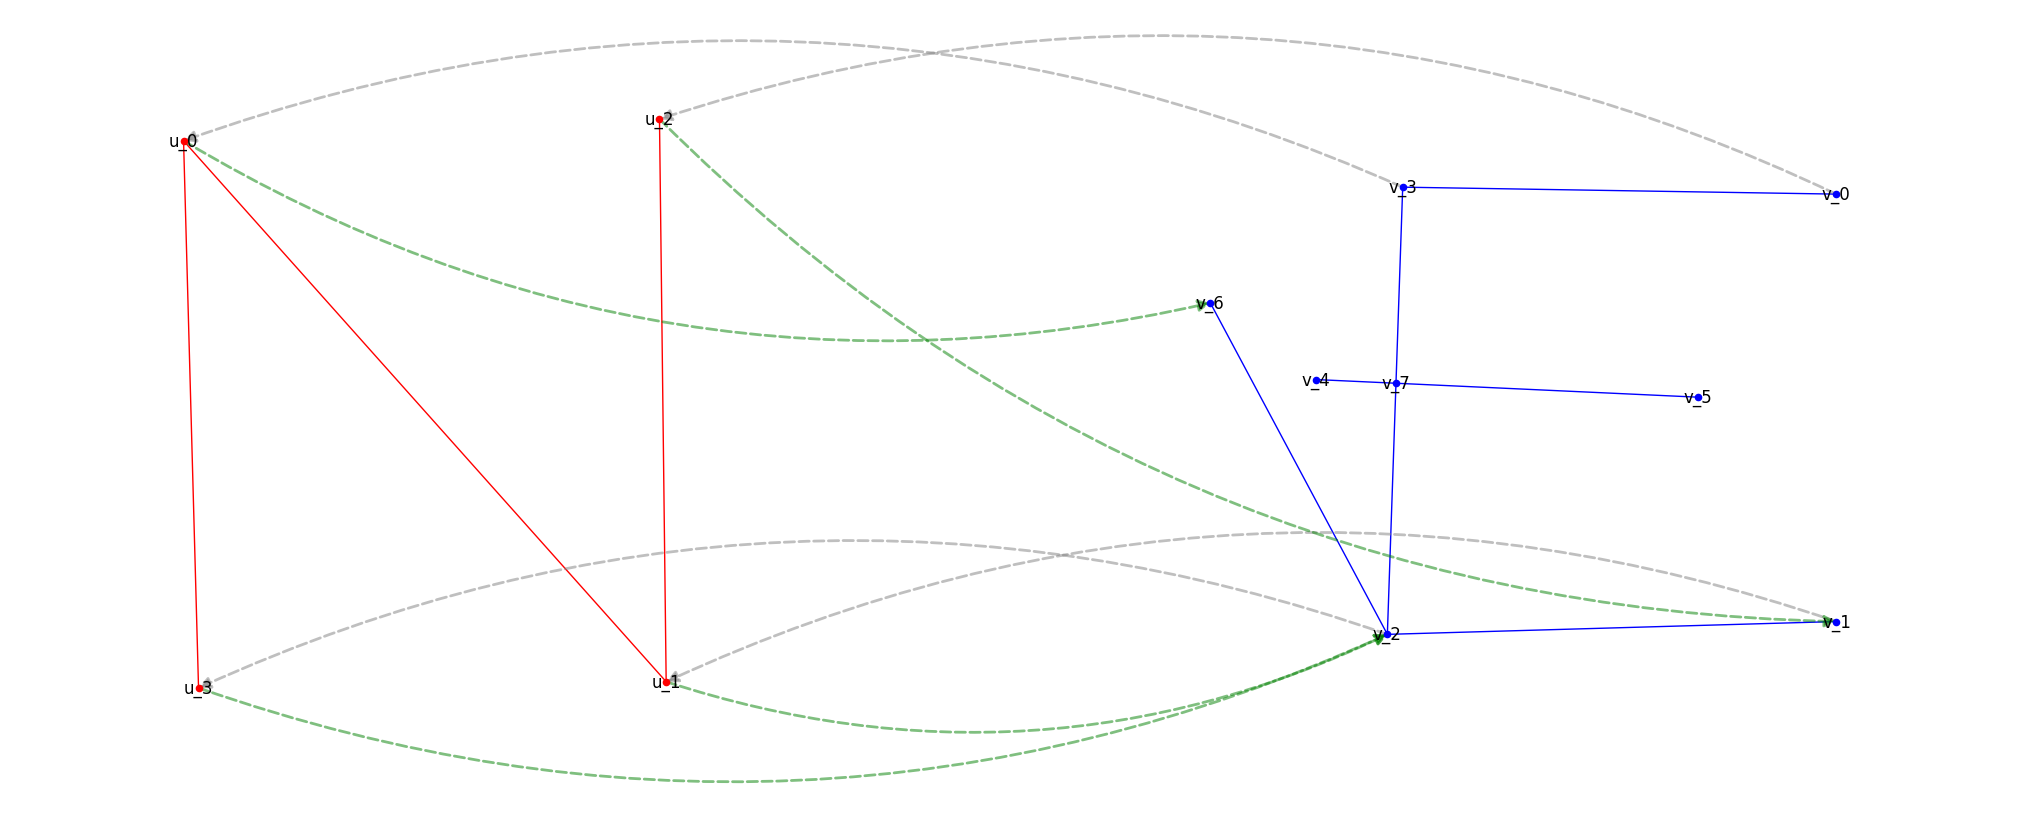

In [19]:
fig = plt.figure(figsize=(20, 8))
nx.draw(G1, pos1, edge_color = "red", node_color = "red", node_size = 20, with_labels = True)
nx.draw(G2, pos2, edge_color = "blue", node_color = "blue", node_size = 20, with_labels = True)
nx.draw(F, pos, edge_color = "gray", width = 2, style = '--', node_size = 0, alpha = 0.5, connectionstyle="arc3, rad=0.2", arrowsize = 17)

nx.draw(H, pos, edge_color = "green", width = 2, style = '--', node_size = 0, alpha = 0.5, connectionstyle="arc3, rad=0.2", arrowsize = 17)
# weights = nx.get_edge_attributes(F, 'weight').values()
# nx.draw(F, pos, **options, width=list(weights))

In [20]:
cost, c

(10.596, 25.514218507950083)